In [ ]:
# # to crope the image
# #Save cropped image of a player
# for track_id, player in tracks['players'][0].items():
#     bbox = player['bbox']
#     frame = video_frames[0]

#     # crop bbox from frame
#     cropped_image = frame[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]

#     # save teh cropped image
#     cv2.imwrite(f"output_videos/cropped_img.jpg", cropped_image)

#     break


In [4]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np


In [5]:
path = "../output_videos/cropped_img.jpg"
#reading the image
image = cv2.imread(path)

#Converting from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

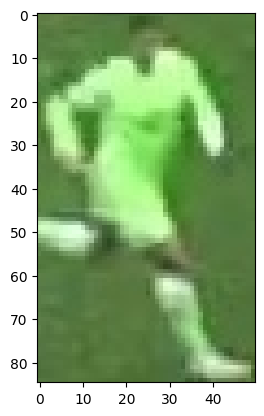

In [6]:
plt.imshow(image)
plt.show()

## take the top half of the image

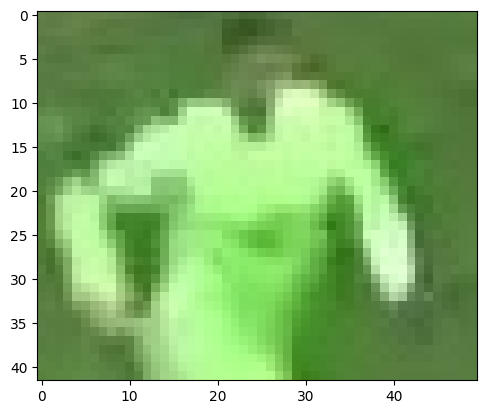

In [7]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image in two clusters

In [8]:
from sklearn.cluster import KMeans

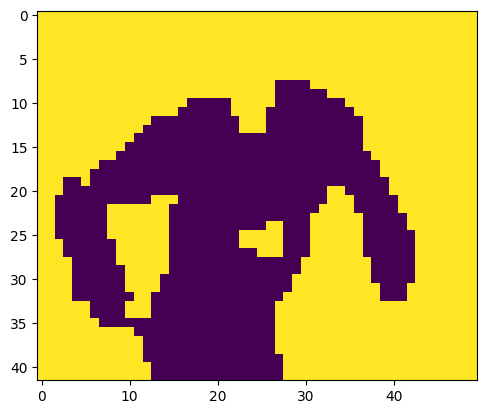

In [10]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1,3)

#perform k means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

#get the cluster label
labels = kmeans.labels_

#reshape the labels into the original image shape 
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#Display the clustered image 
plt.imshow(clustered_image)
plt.show()

In [11]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

non_player_cluster

1

In [13]:
player_cluster = 1-non_player_cluster

player_cluster

0

In [16]:
kmeans.cluster_centers_[player_cluster]

array([171.05408971, 235.43667546, 142.72823219])